#### Imports

In [23]:
import mlflow
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

#### Exploration

In [4]:
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'].values, mnist['target'].values
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


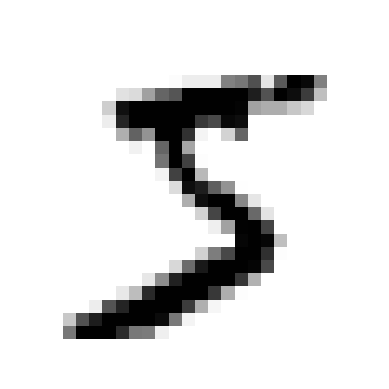

In [6]:
some_digit = X[0]
some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [7]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)

#### Train test bases

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### SGD Classifier

Train and test SGD with digit 5.

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
mlflow.set_experiment('SGDClassifier')

with mlflow.start_run(run_name='Train SGD - Digit 5'):
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(X_train, y_train_5)
    y_pred_5 = sgd_clf.predict([some_digit])

    cv_score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
    y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
    precision_5 = precision_score(y_train_5, y_train_pred)
    recall_5 = recall_score(y_train_5, y_train_pred)
    f1score_5 = f1_score(y_train_5, y_train_pred)

    mlflow.log_metric('Accuracy', cv_score[1])
    mlflow.log_metric('Precision', precision_5)
    mlflow.log_metric('Recall', recall_5)
    mlflow.log_metric('F1 Score', f1score_5)


In [12]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [13]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [14]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [15]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [16]:
threshould = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

<function matplotlib.pyplot.show(close=None, block=None)>

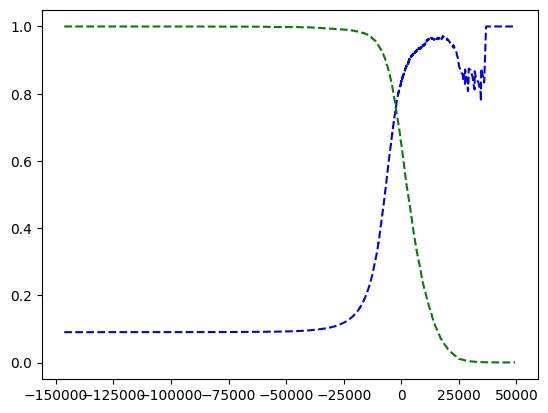

In [18]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show

In [19]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_90 = precision_score(y_train_5, y_train_pred_90)
recall_90 = recall_score(y_train_5, y_train_pred_90)


In [24]:
mlflow.set_experiment('SGDClassifier')
with mlflow.start_run(run_name='SGD Clf - 5s'):
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(X_train, y_train_5)
    y_pred_5 = sgd_clf.predict([some_digit])

    cv_score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
    y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

    precision_5 = precision_score(y_train_5, y_train_pred)
    recall_5 = recall_score(y_train_5, y_train_pred)
    f1score_5 = f1_score(y_train_5, y_train_pred)

    y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
    precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
    threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
    y_train_pred_90 = (y_scores >= threshold_90_precision)
    precision_90 = precision_score(y_train_5, y_train_pred_90)
    recall_90 = recall_score(y_train_5, y_train_pred_90)
    fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
    roc_auc = roc_auc_score(y_train_5, y_scores)

    mlflow.log_metric('Precision Score', precision_90)
    mlflow.log_metric('Recall Score', recall_90)
    mlflow.log_metric('ROC AUC Score', roc_auc)
    

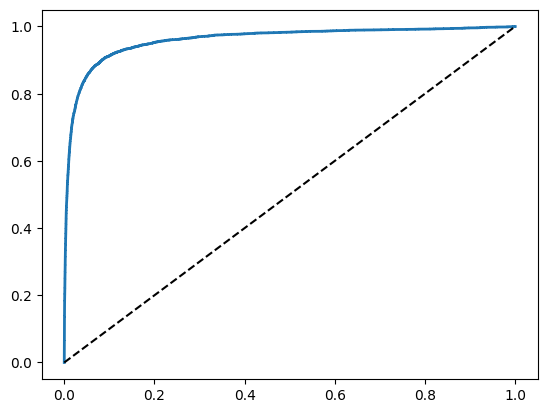

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

### Random Forest Classifier

In [ ]:
mlflow.set_experiment('RFClassifier')
with mlflow.start_run(run_name='RFClassifier - 5s'):
    rfc = RandomForestClassifier(random_state=42)

    y_proba_rfc = cross_val_predict(rfc, X_train, y_train_5, cv=3, method='predict_proba')
    y_scores_rfc = y_proba_rfc[:, 1]
    fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train_5, y_scores_rfc)
    roc_auc_rfc = roc_auc_score(y_train_5, y_scores_rfc)

    mlflow.log_metric('ROC AUC Score', roc_auc_rfc)

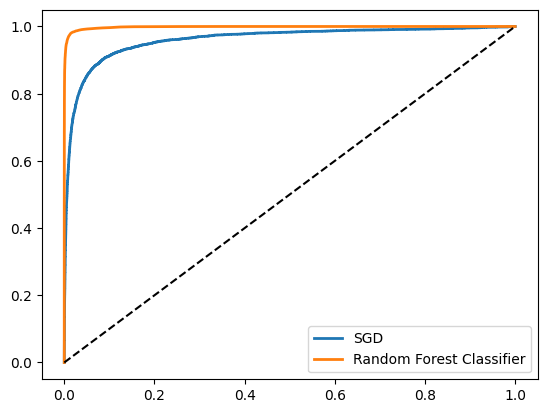

In [33]:
plt.plot(fpr, tpr, linewidth=2, label='SGD')
plot_roc_curve(fpr_rfc, tpr_rfc, 'Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

### SVM

In [10]:
mlflow.set_experiment('Support Vector Classifier')
with mlflow.start_run(run_name='SVC - some_digit'):
    svm = SVC()
    svm.fit(X_train, y_train)
    svm.predict([some_digit])

    some_digit_scores = svm.decision_function([some_digit])

In [15]:
some_digit_scores = svm.decision_function([some_digit])
print('Argmax:', np.argmax(some_digit_scores))
print('All scores:', some_digit_scores)

Argmax: 5
All scores: [[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]


In [16]:
svm.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
ovr.predict([some_digit])


array([5], dtype=uint8)

O tempo que durou para prever com SVC

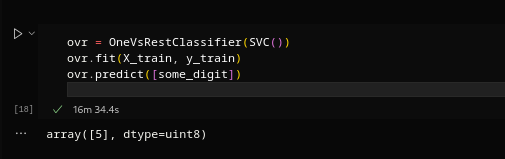

### Voltando ao SGD

In [20]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
sgd.predict([some_digit])

array([3], dtype=uint8)

In [21]:
sgd.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [22]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

### Análise de Erros

In [25]:
y_trainpred = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_trainpred)
print(conf_matrix)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]
